# Model Evaluation

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(precision=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Cross-validation in `sklearn`

In [ ]:
fruits = pd.read_table('/content/drive/MyDrive/DataScience2023/chap06_machine_learning/datasets/fruit_data_with_colors.txt')
fruits = fruits.dropna()

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.to_numpy()
y = y_fruits_2d.to_numpy()

cv_scores = cross_val_score(clf, X, y, cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.8  0.75 0.84]
Mean cross-validation score (3-fold): 0.797


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from pprint import pprint
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
pprint(iris)

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '  

In [ ]:
scores = cross_val_score(logreg, iris.data, iris.target)  # default cv = 5
print("Cross-validation scores: {}".format(scores))
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores: [0.97 1.   0.93 0.97 1.  ]
Mean cross-validation score (5-fold): 0.797


In [ ]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
res

{'fit_time': array([0.07, 0.15, 0.08, 0.03, 0.04]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.97, 1.  , 0.93, 0.97, 1.  ]),
 'train_score': array([0.97, 0.97, 0.98, 0.98, 0.97])}

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75 0.6  0.67]


## Evaluation for Classification

### Preamble

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [ ]:
X.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

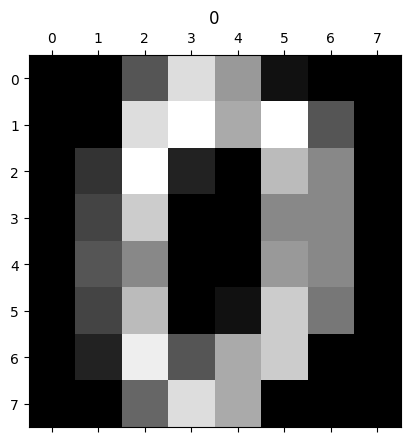

In [ ]:
plt.gray()
plt.matshow(X[0].reshape((8,8)))
plt.title(y[0])
plt.show()

In [ ]:
# Creating a dataset with imbalanced binary classes:
# Negative class (0) is 'not digit 1'
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier는 간단한 규칙을 사용하여 예측을 하는 분류기로, 특히 불균형한 클래스의 경우 실제 분류기와 비교할 때 기준선(baseline)으로 유용할 수 있다.

In [ ]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [ ]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[359  48]
 [ 35   8]]


In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000).fit(X_train, y_train) # default max iteration is 100
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[403   4]
 [  7  36]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [ ]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [ ]:
print('Random class-proportional (dummy)\n',
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n',
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n',
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n',
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.88      0.90       407
           1       0.14      0.19      0.16        43

    accuracy                           0.82       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.84      0.82      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.99       407
           1       0.90      0.84      0.87        43

    accuracy                           0.98       450
   macro avg       0.94      0.91      0.93       450
weighted avg 

### Decision functions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -34.62004996225904),
 (0, -18.00442545319492),
 (0, -20.993667999127712),
 (0, -36.80005421209292),
 (0, -39.322941913678946),
 (0, -18.859377792615682),
 (1, 6.0008643052571635),
 (0, -32.70549809843082),
 (0, -35.479780474785315),
 (0, -37.344751858586534),
 (0, -25.036111300760783),
 (0, -21.40278101311777),
 (0, -36.49809259931502),
 (0, -15.918081477445476),
 (0, -12.8383549397564),
 (0, -13.724136783969795),
 (1, 14.765800229971642),
 (0, -39.39802607243314),
 (0, -26.09357130243491),
 (0, -28.436481431051696)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 9.219414438666943e-16),
 (0, 1.5162728869332996e-08),
 (0, 7.630725531160656e-10),
 (0, 1.0421722906870567e-16),
 (0, 8.361098016961761e-18),
 (0, 6.448761119623039e-09),
 (1, 0.9975295077438596),
 (0, 6.2543567223492356e-15),
 (0, 3.902358106555605e-16),
 (0, 6.044777779278604e-17),
 (0, 1.3395379246722318e-11),
 (0, 5.068626716494082e-10),
 (0, 1.40954772227428e-16),
 (0, 1.2214199206638531e-07),
 (0, 2.6568812202623265e-06),
 (0, 1.0956772643375126e-06),
 (1, 0.9999996133711377),
 (0, 7.756301435656342e-18),
 (0, 4.652709850881837e-12),
 (0, 4.4688217258465074e-13)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_svm_rbf = SVC(kernel='rbf', C=1).fit(X_train, y_train).decision_function(X_test)
y_score_list_svm_rbf = list(zip(y_test[0:20], y_scores_svm_rbf[0:20]))

# show the decision_function scores for first 20 instances
y_score_list_svm_rbf

[(0, -2.0782527695291093),
 (0, -1.5909677157627504),
 (0, -1.8510848414080683),
 (0, -1.9873840223994006),
 (0, -2.369031859310518),
 (0, -1.0577737941831111),
 (1, 0.8252313330530584),
 (0, -1.6280405891857084),
 (0, -2.4224837403320247),
 (0, -1.8959031112138511),
 (0, -1.654481139390115),
 (0, -0.8885747969707529),
 (0, -2.244501009599728),
 (0, -1.377547702569436),
 (0, -1.1930861117007838),
 (0, -1.2118259860367644),
 (1, 1.2085758663619695),
 (0, -2.603134579156503),
 (0, -1.7721847597330167),
 (0, -2.109562979953074)]

### Precision-recall curves

[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16
 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.17 0.17 0.17 0.17 0.17 0.17
 0.17 0.

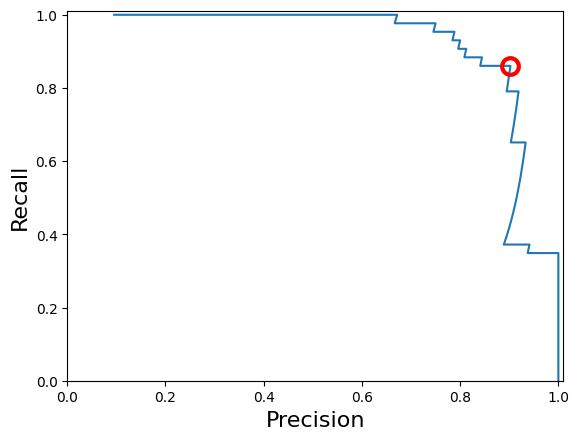

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

print(precision)
print(recall)
print(thresholds)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13 0.13
 0.13 0.13 0.13 0.13 0.13 0.13 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16
 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.17 0.17 0.17 0.17 0.17 0.17
 0.17 0.

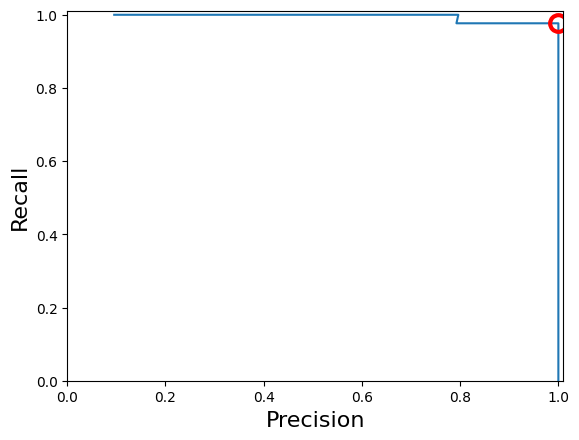

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_svm_rbf)

print(precision)
print(recall)
print(thresholds)


closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

### ROC curves, Area-Under-Curve (AUC)

[0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.02 0.02 0.02
 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.05 0.05 1.  ]
[0.   0.02 0.35 0.35 0.37 0.37 0.65 0.65 0.79 0.79 0.86 0.86 0.88 0.88
 0.91 0.91 0.93 0.93 0.95 0.95 0.98 0.98 1.   1.  ]
[ 25.58  24.58   8.32   8.22   8.22   8.11   5.91   5.75   2.2    1.98
  -0.14  -0.99  -1.05  -1.77  -2.14  -2.81  -3.09  -3.68  -3.84  -5.01
  -5.38  -6.76  -7.51 -67.19]


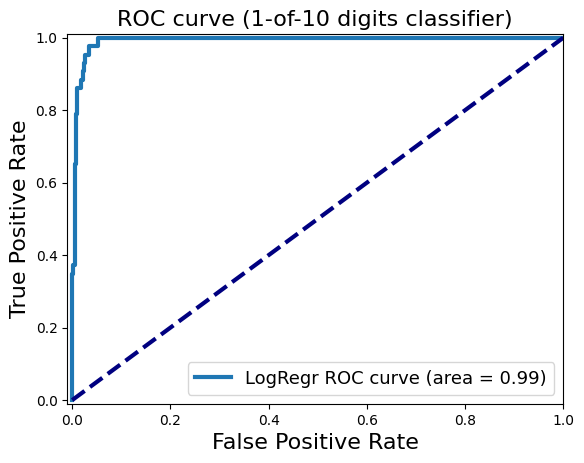

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)


y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_score_lr)

print(fpr_lr)
print(tpr_lr)
print(threshold_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


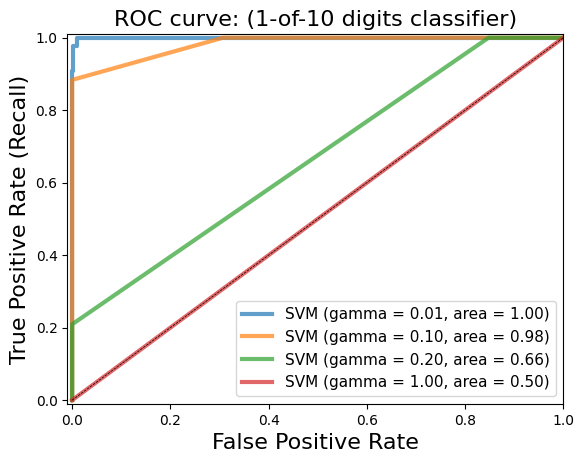

In [ ]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm,
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7,
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

In [ ]:
import seaborn as sns

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)

print(confusion_mc)

svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)

print(confusion_mc)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


#### Multi-class classification report

In [ ]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)
